PassengerId : 0
Survived : 0
Pclass : 0
Sex : 0
Age : 0
SibSp : 0
Parch : 0
Fare : 0
Embarked : 0
Title : 0


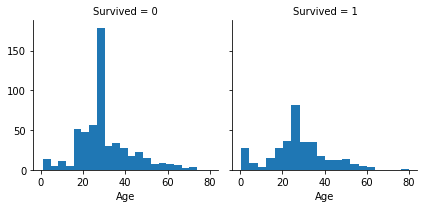

In [17]:
# Import Dependencies:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns







# Creating The Data Frame
df = pd.read_csv('train.csv')



# Get Title Function
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()

    else:
        return 'Unknown'
    
# Replace Titles Function:
def replace_titles(x):
    title = x['Title']

    if title in ['Capt', 'Col', 'Major']:
        return 'Officer'
    
    elif title in ['Jonkheer',"Don", "the Countess", "Dona", "Lady", "Sir"]:
        return 'Royalty'
    
    elif title in ["Mlle", "Ms"]:
        return 'Miss'

    elif title == 'Mme':
        return 'Mrs'

    else:
        return title
    
# Creating 'Title' Column:
df['Title'] = df['Name'].map(lambda x: get_title(x))
df['Title'] = df.apply(replace_titles, axis=1)

# Filling The Null Values:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna("S", inplace=True)

# Droping The UnNececery Columns:
df.drop('Name', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)

# Converting The Remaining Data From String To Numeric:
df.Sex.replace(("male", "female"), (0,1), inplace=True)
df.Embarked.replace(('S', 'Q', 'C'), (0,1,3), inplace=True)
df.Title.replace(("Mr", "Miss", "Mrs", "Master", "Dr", "Rev", "Royalty", "Officer"), (1,2,3,4,5,6,7,8), inplace=True)

# Showing The Null Values:
for column in df:
    print(column, ":", df[column].isnull().sum())


# Creating A Graph With Seaborn And MatplotLib lib:
graph = sns.FacetGrid(df, col="Survived")
graph.map(plt.hist, "Age", bins=20)

# Droping Out Lying Datas:
df.loc[df["Age"] > 70, "Age"] = 70